<a href="https://colab.research.google.com/github/utsha95/Deeplearning-n-o/blob/main/Deeplearning_n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [207]:
# Importing libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import tensorflow as tf
from tensorflow.keras import layers  # Import layers from tensorflow.keras
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [208]:
# Mount with google drive
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [209]:
# Load datasets
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Student_Data (5).csv')

In [210]:
# Preprocess the data
# Replace 'student_data' with 'df' to use the loaded DataFrame
student_data_cleaned = df.drop(columns=['Timestamp', 'Name', 'DOB'])
label_encoder = LabelEncoder()
student_data_cleaned['Problem solving'] = label_encoder.fit_transform(student_data_cleaned['Problem solving'].astype(str))

categorical_cols = student_data_cleaned.select_dtypes(include=['object']).columns
student_data_encoded = student_data_cleaned.copy()

for col in categorical_cols:
    student_data_encoded[col] = label_encoder.fit_transform(student_data_encoded[col].astype(str))

In [211]:
# Import SimpleImputer if not already imported
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')
student_data_imputed = pd.DataFrame(imputer.fit_transform(student_data_encoded), columns=student_data_encoded.columns)

X = student_data_imputed.drop(columns=['Problem solving'])
y = student_data_imputed['Problem solving']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [212]:
# Display the first few rows of the data
print(df.head())

             Timestamp                   Name  Gender                  DOB  \
0  2024-05-14 22:38:07         Sadia sultana   Female  2001-06-23 00:00:00   
1  2024-05-14 22:45:20       Fariha Tabassum   Female  2002-04-12 00:00:00   
2  2024-05-14 23:21:03    Maliha Adiv Nujhat   Female  2004-01-31 00:00:00   
3  2024-05-14 23:30:10  Farzana Akter Anamika  Female  2002-08-18 00:00:00   
4  2024-05-14 23:57:42            Fatema Alam  Female  2001-02-28 00:00:00   

  Academic performance (cgpa) except level-term:1-1  \
0                                  3.75-4.00 (high)   
1                                3.25-3.70 (medium)   
2                                3.25-3.70 (medium)   
3                                               NaN   
4                                3.25-3.70 (medium)   

  level-term:1-1 (can include ssc,hsc gpa)  Previous semester absence days  \
0                                       No                               3   
1                                      NaN  

In [213]:
# Assuming the target column is 'Problem solving' (change if needed)
target_column = 'Problem solving'

In [214]:
# Check for non-numeric columns
non_numeric_cols = df.select_dtypes(exclude=[np.number]).columns
print("Non-numeric columns: ", non_numeric_cols)

Non-numeric columns:  Index(['Timestamp', 'Name', 'Gender', 'DOB',
       'Academic performance (cgpa) except level-term:1-1',
       'level-term:1-1 (can include ssc,hsc gpa)',
       ' Previous semester absence days', 'Academic achievement of mother',
       'Academic achievement of father ', 'Father's job', 'Mother's job',
       'Parents condition', 'No's of past class failures ', 'Travel duration',
       'Study session [Hour]', 'Health status [Physical]',
       'Health status [Spritual]', 'Health status [Emotional]',
       'Health status [Social]', 'Most used apps [Facebook]',
       'Most used apps [Instagram]', 'Most used apps [Tiktok]',
       'Most used apps [Whatsapp]', 'Most used apps [Messenger]',
       'Most used apps [Telegram]', 'Daily facebook browsing time [Hour]',
       'Physical activity', 'Extra Curricular involvement [Sports]',
       'Extra Curricular involvement [Arts]',
       'Extra Curricular involvement [Clubs]',
       'Extra Curricular involvement [Vol

In [215]:
# Example: Drop non-numeric columns like dates
df_clean = df.drop(non_numeric_cols, axis=1)

In [216]:
# Check if the target column exists
if target_column not in df_clean.columns:
    print(f"Column '{target_column}' not found in the dataset.")
else:
    # Define features (X) and target (y)
    X = df_clean.drop(target_column, axis=1)  # No indentation error
    y = df_clean[target_column]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Standardize the data
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    print("Data successfully split and standardized.")

Column 'Problem solving' not found in the dataset.


In [217]:
num_classes = len(np.unique(y))

# Build the model for multiclass classification
model = tf.keras.Sequential([
    layers.InputLayer(input_shape=(X_train_scaled.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(num_classes, activation='softmax') # Changed for multiclass
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']) # Changed loss function

history = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=20, batch_size=32)


Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.2925 - loss: 1.4338 - val_accuracy: 0.4286 - val_loss: 1.2877
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5202 - loss: 1.2335 - val_accuracy: 0.5714 - val_loss: 1.1470
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6965 - loss: 1.0693 - val_accuracy: 0.6883 - val_loss: 1.0275
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7602 - loss: 0.9357 - val_accuracy: 0.7403 - val_loss: 0.9289
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8373 - loss: 0.8250 - val_accuracy: 0.7403 - val_loss: 0.8434
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8254 - loss: 0.7271 - val_accuracy: 0.7403 - val_loss: 0.7622
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8271 - loss: 0.6431 - val_accuracy: 0.7922 - val_loss: 0.6861
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8609 - loss: 0.6002 - val_accuracy: 0.8182 - val_loss: 0.6174
Epoch 9/20


In [218]:
def build_and_compile_model():
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    # Correctly indented inside the function
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model
    # Train the model
    history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))
    return model, history
    # Evaluate the model
    scores = model.evaluate(X_test, y_test)
    print(f"Test Accuracy: {scores[1] * 100:.2f}%")

    # Predict on the test set
    y_pred = (model.predict(X_test) > 0.5).astype("int32")
    # Correctly indented outside the function
    print("Model training completed.")
    return y_pred

In [219]:
# Calculate the confusion matrix
y_pred_prob = model.predict(X_test_scaled)
y_pred = np.argmax(y_pred_prob, axis=1) # Corrected: Get class index with highest probability

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Confusion Matrix:
[[34  0  0  0]
 [ 0 22  0  0]
 [ 2  0 17  0]
 [ 0  0  0  2]]


In [220]:
# Optional: Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97        34
         1.0       1.00      1.00      1.00        22
         2.0       1.00      0.89      0.94        19
         3.0       1.00      1.00      1.00         2

    accuracy                           0.97        77
   macro avg       0.99      0.97      0.98        77
weighted avg       0.98      0.97      0.97        77



In [221]:
# Accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 97.40%
Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97        34
         1.0       1.00      1.00      1.00        22
         2.0       1.00      0.89      0.94        19
         3.0       1.00      1.00      1.00         2

    accuracy                           0.97        77
   macro avg       0.99      0.97      0.98        77
weighted avg       0.98      0.97      0.97        77



3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


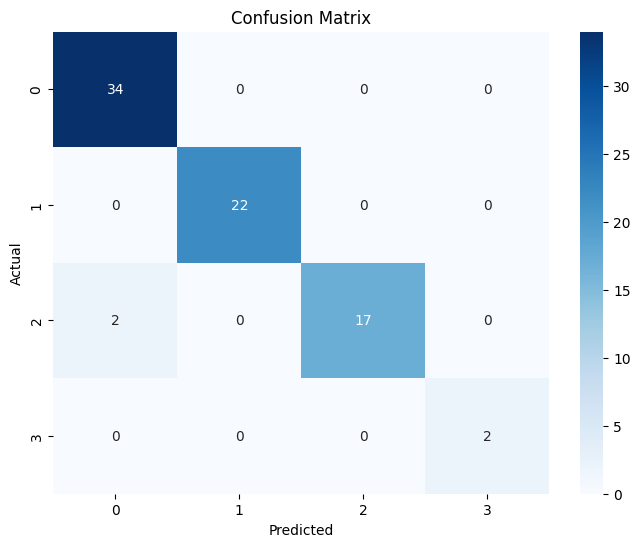

In [222]:
# Confusion matrix
y_pred_prob = model.predict(X_test_scaled)
y_pred = np.argmax(y_pred_prob, axis=1) # Corrected: Use argmax for multiclass predictions

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


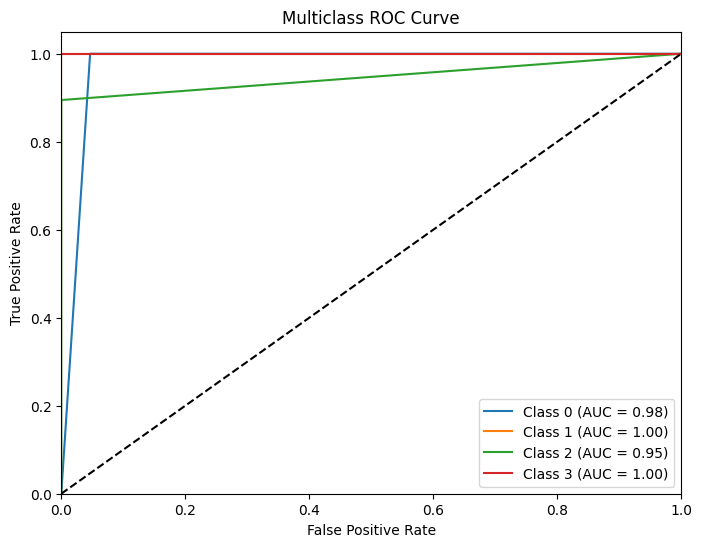

In [223]:
# Assuming 'y_test' has multiple classes, let's binarize the labels
n_classes = len(np.unique(y_test))

# Binarize the output for multiclass ROC curve
y_test_bin = label_binarize(y_test, classes=[*range(n_classes)])
y_pred_prob_bin = label_binarize(y_pred, classes=[*range(n_classes)])

# One-vs-Rest (OvR) approach
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting the ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [224]:
# Standard deviation of predictions
std_dev = np.std(y_pred_prob)
print(f'Standard Deviation of Predictions: {std_dev}')

Standard Deviation of Predictions: 0.3702913224697113


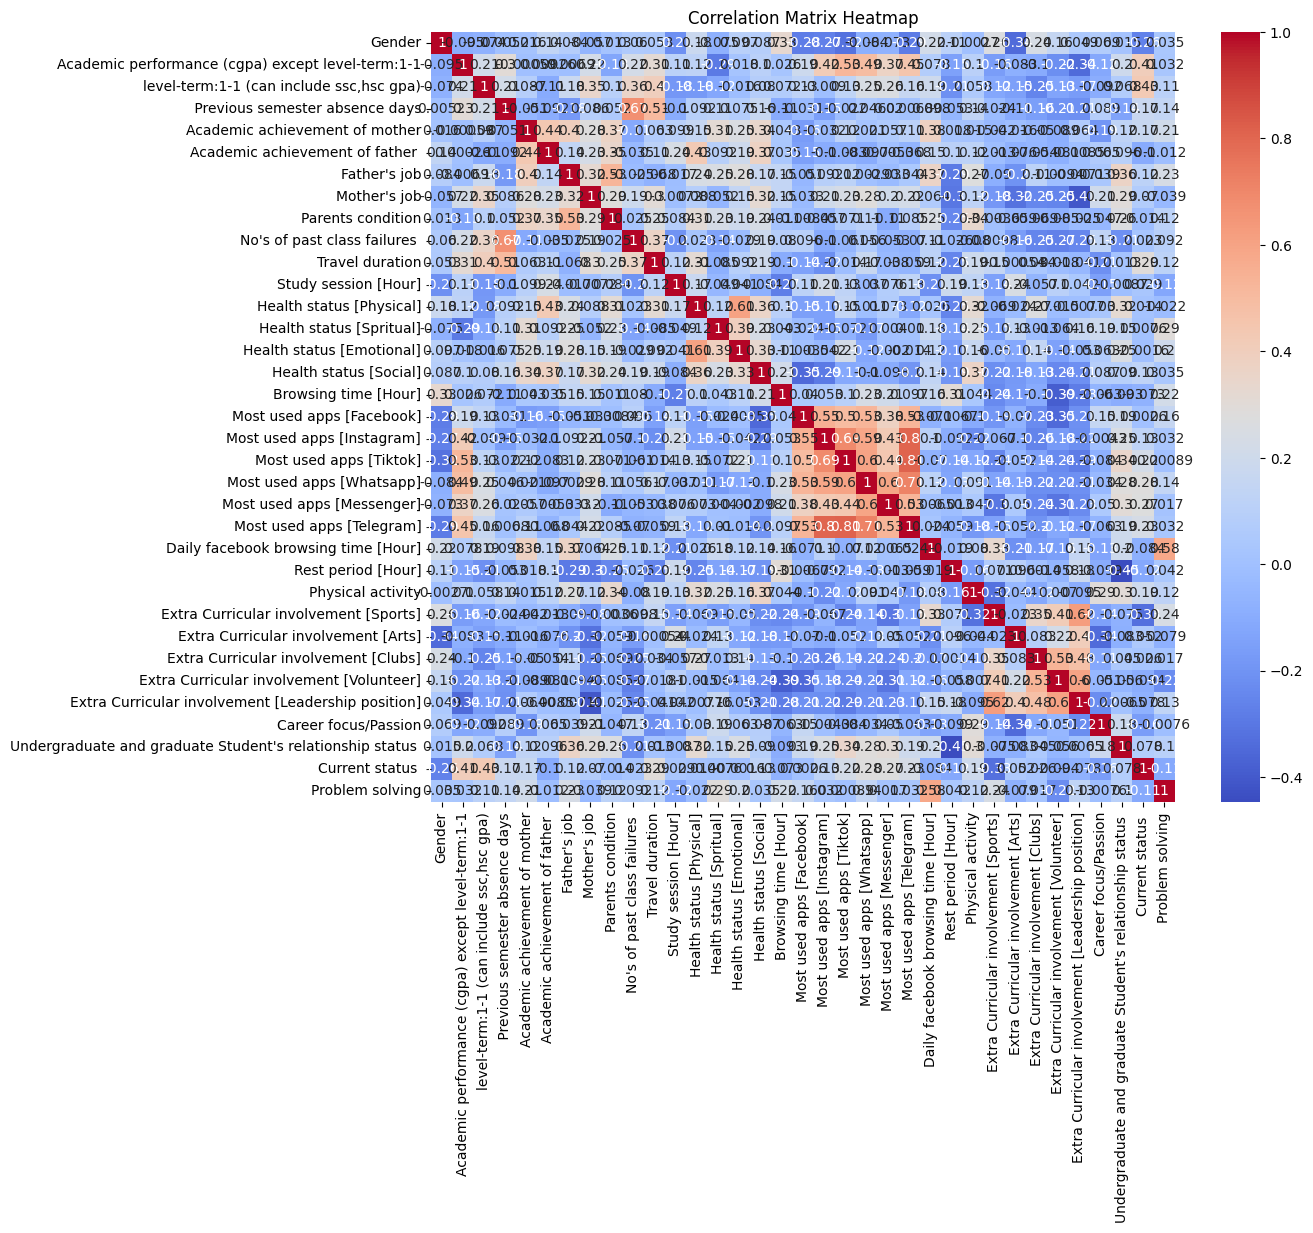

In [225]:
# Correlation Matrix Heatmap (on the dataset features)
plt.figure(figsize=(12, 10))
correlation_matrix = student_data_imputed.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()